In [1]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score


import random
# fixing random seed for reproducibility
random.seed(200216758)
np.random.seed(200216758)

### Load the MRI+MMSE dataset

In [2]:
mri_data_df = pd.read_csv("/Users/shrutidudwadkar/Documents/Dissertation/Final_Data+Code/MRI/Processed/mri_mmse.csv") 
mri_data_df.drop(columns=['RID'], inplace=True)
mri_data_df.head()

,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,...,ST99SA,ST99TA,ST99TS,ST9SV,MMSCORE_sc,MMSCORE_m06,MMSCORE_m12,MMSCORE_m24,MMSCORE_m36,label
0,1578,2862,1312,2.065,0.609,2305,763,2.650,0.795,2934,...,3387,2.911,0.660,1623,29,29,30,29,30,CN
1,1102,3339,1386,2.297,0.702,1621,631,2.166,0.760,2517,...,3046,2.850,0.714,1296,29,29,28,30,29,CN
2,1226,2719,1477,1.781,0.538,1813,622,2.409,0.778,3397,...,2832,2.735,0.617,1998,28,29,30,28,26,CN
3,744,3456,1748,1.960,0.620,1792,623,2.496,0.776,3106,...,2692,3.025,0.596,1493,30,29,30,29,30,CN
4,908,2741,1216,2.228,0.612,2095,753,2.518,0.884,3696,...,3375,2.736,0.697,1997,26,28,28,29,28,CN


In [3]:
mri_features = mri_data_df.columns.values.tolist()
print("There are total ", len(mri_features)-1, " features. \n")

There are total  332  features. 



### Distribution of subjects across 3 labels

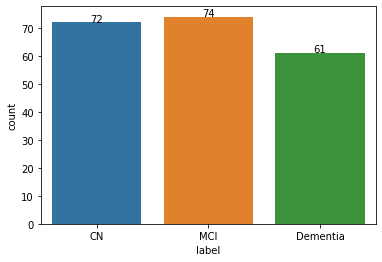

In [4]:
graph = sns.countplot(x="label", data=mri_data_df);
for p in graph.patches: 
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.2, height, ha="center")


In [5]:
encoder = preprocessing.LabelEncoder()
mri_data_df['label']= encoder.fit_transform(mri_data_df['label'])
mri_data_df['label'].unique()
mri_data_df.head()

,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,...,ST99SA,ST99TA,ST99TS,ST9SV,MMSCORE_sc,MMSCORE_m06,MMSCORE_m12,MMSCORE_m24,MMSCORE_m36,label
0,1578,2862,1312,2.065,0.609,2305,763,2.650,0.795,2934,...,3387,2.911,0.660,1623,29,29,30,29,30,0
1,1102,3339,1386,2.297,0.702,1621,631,2.166,0.760,2517,...,3046,2.850,0.714,1296,29,29,28,30,29,0
2,1226,2719,1477,1.781,0.538,1813,622,2.409,0.778,3397,...,2832,2.735,0.617,1998,28,29,30,28,26,0
3,744,3456,1748,1.960,0.620,1792,623,2.496,0.776,3106,...,2692,3.025,0.596,1493,30,29,30,29,30,0
4,908,2741,1216,2.228,0.612,2095,753,2.518,0.884,3696,...,3375,2.736,0.697,1997,26,28,28,29,28,0


In [6]:
print(encoder.classes_)

['CN' 'Dementia' 'MCI']


In [7]:
X_mri, y_mri = np.split(mri_data_df.to_numpy(), [-1], axis=1) 

### Split the dataset into train and test data using 85:15 split

In [8]:
X_train_mri, X_test_mri, y_train_mri, y_test_mri = train_test_split(X_mri, y_mri, test_size=0.15, random_state=44)


### Scaling

In [9]:
sc = StandardScaler()
X_train_mri = sc.fit_transform(X_train_mri)
X_test_mri = sc.transform(X_test_mri)

### SGDClassifier using l1 penalty

In [10]:
#classifier_mri = SGDClassifier(penalty='l1', alpha=0.09, max_iter=10e5, loss='log')
classifier_mri = SGDClassifier(penalty='l1', alpha=0.03, max_iter=10e7, loss='log')
classifier_mri.fit(X_train_mri, y_train_mri)
y_pred = classifier_mri.predict(X_test_mri)

print("Classification report: ")
print(classification_report(y_test_mri , y_pred))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.40      0.67      0.50         6
         2.0       0.83      0.62      0.71        16

    accuracy                           0.72        32
   macro avg       0.71      0.73      0.70        32
weighted avg       0.77      0.72      0.73        32



/Users/shrutidudwadkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [11]:
print(accuracy_score(y_test_mri, y_pred))

0.71875


In [12]:
train_score = classifier_mri.score(X_train_mri, y_train_mri)
test_score = classifier_mri.score(X_test_mri, y_test_mri)
coeff_used = np.sum(classifier_mri.coef_ != 0)

print("training score: ", train_score)
print("test score: ", test_score)


training score:  0.9142857142857143
test score:  0.71875


In [13]:
sel_cols = list(mri_data_df.columns[:-1][(classifier_mri.coef_!=0)[0]]) + list(mri_data_df.columns[:-1][(classifier_mri.coef_!=0)[1]]) + list(mri_data_df.columns[:-1][(classifier_mri.coef_!=0)[2]])
sel_cols = list(dict.fromkeys(sel_cols))
print("number of features used: ", len(sel_cols))
rem_cols= ['MMSCORE_sc', 'MMSCORE_m06', 'MMSCORE_m12','MMSCORE_m24','MMSCORE_m36']
sel_cols = list(set(sel_cols) - set(rem_cols))


number of features used:  105


In [14]:
mri_data_fusion_df = mri_data_df[sel_cols]
mri_data_fusion_df

,ST54SA,ST72TA,ST118TA,ST40SA,ST51TA,ST31SA,ST112SV,ST121SA,ST46TA,ST25CV,...,ST54CV,ST1SV,ST13TS,ST17SV,ST68SV,ST106TA,ST103TS,ST123CV,ST58TS,ST11SV
0,889,2.339,2.422,2832,2.079,6463,4816,368,2.609,540,...,2941,22015,0.516,54024,51,2.099,0.795,7207,0.634,505
1,472,2.345,2.461,2024,2.284,3846,4133,251,1.915,441,...,1789,15665,0.534,37451,30,2.048,0.760,5794,0.724,256
2,570,2.404,2.397,2804,1.972,3672,4139,259,2.477,584,...,1953,21483,0.583,43883,43,2.162,0.778,7397,0.673,549
3,767,2.586,2.261,2702,1.932,4797,4726,304,2.668,574,...,2490,19150,0.425,42210,11,2.534,0.776,6222,0.674,523
4,745,2.328,2.218,2837,2.366,4447,4080,366,2.390,491,...,2333,21086,0.493,56871,47,2.213,0.884,6836,0.796,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,579,1.850,2.424,2813,2.450,4213,5238,328,2.361,739,...,2223,24300,0.472,45914,19,2.201,0.787,6798,0.769,618
203,750,2.304,2.188,2607,1.879,5305,4572,317,2.396,518,...,2479,20872,0.494,38362,42,2.087,0.874,7142,0.642,364
204,907,2.239,2.444,3289,2.272,3713,5250,357,2.337,670,...,2839,26053,0.494,55407,34,2.215,0.890,8028,0.684,578
205,510,2.573,2.458,2250,2.312,3900,3300,246,2.633,632,...,2018,18744,0.584,43895,27,2.450,0.744,6734,0.765,403


In [15]:
auc = roc_auc_score(y_test_mri, classifier_mri.predict_proba(X_test_mri), multi_class='ovr')
print("AUC: ", auc)

AUC:  0.8120799339549339


In [16]:
rmse = sqrt(mean_squared_error(y_test_mri, y_pred))
print("RMSE: ", rmse)

RMSE:  0.6123724356957945


### Load the PET+MMSE dataset


In [17]:
pet_data_df = pd.read_csv("/Users/shrutidudwadkar/Documents/Dissertation/Final_Data+Code/PET/Processed/pet_mmse.csv") 
pet_data_df.drop(columns=['RID'], inplace=True)

pet_data_df.head()

,CP_MEAN,CP_MEDIAN,CP_MODE,CP_MIN,CP_MAX,CP_STDEV,AL_MEAN,AL_MEDIAN,AL_MODE,AL_MIN,...,TR_MODE,TR_MIN,TR_MAX,TR_STDEV,MMSCORE_sc,MMSCORE_m06,MMSCORE_m12,MMSCORE_m24,MMSCORE_m36,label
0,1.42132,1.46006,1.010860,1.010860,1.59085,0.135861,1.35493,1.38456,1.062030,1.062030,...,0.965637,0.965637,1.30464,0.068228,29,29,30,29,30,CN
1,1.35138,1.43394,0.671526,0.671526,1.71550,0.242687,1.22372,1.22393,1.014400,1.014400,...,1.056220,1.056220,1.36527,0.074463,29,29,28,30,29,CN
2,1.63455,1.64769,1.234410,1.234410,1.86328,0.133708,1.52068,1.52008,1.142760,1.142760,...,0.788854,0.788854,1.37939,0.140904,28,29,30,28,26,CN
3,1.37415,1.41541,0.926628,0.926628,1.65001,0.164401,1.47392,1.47777,0.997425,0.997425,...,1.022780,1.022780,1.39271,0.081254,30,29,30,29,30,CN
4,1.43045,1.47362,0.910827,0.910827,1.68188,0.191474,1.37903,1.40453,0.874430,0.874430,...,1.100920,1.100920,1.37395,0.059151,26,28,28,29,28,CN


In [18]:
pet_features = pet_data_df.columns.values.tolist()
print("There are total ", len(pet_features)-1, " features. \n")

There are total  35  features. 



In [19]:
encoder = preprocessing.LabelEncoder()
pet_data_df['label']= encoder.fit_transform(pet_data_df['label'])
pet_data_df['label'].unique()
pet_data_df.head()
pet_data_df_fi =pet_data_df

### Feature selction using Univariate Selection

In [20]:
X = pet_data_df.iloc[:,0:35]
y = pet_data_df.iloc[:,-1]  

In [21]:
bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)

In [22]:
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs      Score
34  MMSCORE_m36  59.133971
33  MMSCORE_m24  38.577862
32  MMSCORE_m12  16.494915
31  MMSCORE_m06  11.221813
30   MMSCORE_sc   4.554861
4        CP_MAX   1.216650
1     CP_MEDIAN   1.054037
0       CP_MEAN   1.009330
10       AL_MAX   0.914336
7     AL_MEDIAN   0.740034


In [23]:
columns = featureScores.nlargest(10,'Score')['Specs'].tolist()
columns.append('label')
pet_data_df = pet_data_df[columns]
pet_data_df.head()

,MMSCORE_m36,MMSCORE_m24,MMSCORE_m12,MMSCORE_m06,MMSCORE_sc,CP_MAX,CP_MEDIAN,CP_MEAN,AL_MAX,AL_MEDIAN,label
0,30,29,30,29,29,1.59085,1.46006,1.42132,1.48234,1.38456,0
1,29,30,28,29,29,1.71550,1.43394,1.35138,1.39319,1.22393,0
2,26,28,30,29,28,1.86328,1.64769,1.63455,1.71677,1.52008,0
3,30,29,30,29,30,1.65001,1.41541,1.37415,1.67836,1.47777,0
4,28,29,28,28,26,1.68188,1.47362,1.43045,1.55640,1.40453,0


In [24]:
pet_data_fusion_df = pet_data_df
pet_data_fusion_df

,MMSCORE_m36,MMSCORE_m24,MMSCORE_m12,MMSCORE_m06,MMSCORE_sc,CP_MAX,CP_MEDIAN,CP_MEAN,AL_MAX,AL_MEDIAN,label
0,30,29,30,29,29,1.59085,1.46006,1.42132,1.48234,1.384560,0
1,29,30,28,29,29,1.71550,1.43394,1.35138,1.39319,1.223930,0
2,26,28,30,29,28,1.86328,1.64769,1.63455,1.71677,1.520080,0
3,30,29,30,29,30,1.65001,1.41541,1.37415,1.67836,1.477770,0
4,28,29,28,28,26,1.68188,1.47362,1.43045,1.55640,1.404530,0
...,...,...,...,...,...,...,...,...,...,...,...
202,27,28,28,28,27,1.53736,1.34343,1.32522,1.28098,1.154530,2
203,30,30,30,29,29,1.50612,1.31512,1.29116,1.44391,1.300910,2
204,29,29,29,28,28,1.51473,1.39244,1.33926,1.26802,1.159030,2
205,24,22,26,26,28,1.47965,1.31724,1.29768,1.08829,0.997788,1


In [25]:
X_pet, y_pet = np.split(pet_data_df.to_numpy(), [-1], axis=1) 

### Split the dataset into train and test data using 85:15 split

In [26]:
X_train_pet, X_test_pet, y_train_pet, y_test_pet = train_test_split(X_pet, y_pet, test_size=0.15, random_state=44)


### Scaling

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_pet = min_max_scaler.fit_transform(X_train_pet)
X_test_pet = min_max_scaler.transform(X_test_pet)

### Gaussian NB Classifier

In [28]:
gnb = GaussianNB().fit(X_train_pet, y_train_pet)
gnb_predictions = gnb.predict(X_test_pet)

print("Classification report: ")
print(classification_report(y_test_pet , gnb_predictions))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.62      0.80      0.70        10
         1.0       0.75      1.00      0.86         6
         2.0       0.82      0.56      0.67        16

    accuracy                           0.72        32
   macro avg       0.73      0.79      0.74        32
weighted avg       0.74      0.72      0.71        32



/Users/shrutidudwadkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
print(accuracy_score(y_test_pet, gnb_predictions))

0.71875


In [30]:
auc = roc_auc_score(y_test_pet, gnb.predict_proba(X_test_pet), multi_class='ovr')
print("AUC: ", auc)

AUC:  0.8352497329059828


In [31]:
rmse = sqrt(mean_squared_error(y_test_pet , gnb_predictions))
print("RMSE: ", rmse)

RMSE:  0.9682458365518543


### Late fusion or Classifier fusion using Voting classifier

Reference taken from https://stackoverflow.com/questions/45074579/votingclassifier-different-feature-sets

In [32]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

def fit_estimators(classifiers, X_list, y, sample_weights = None):

    le_ = LabelEncoder()
    le_.fit(y)
    
    estimators_ = [clf.fit(X, y) if sample_weights is None else clf.fit(X, y, sample_weights) for clf, X in zip([clf for _, clf in classifiers], X_list)]

    return estimators_, le_


def predict_from_estimators(estimators, label_encoder, X_list, weights = [1, 1]):

    # Soft voting approach

    pred1 = np.asarray([clf.predict_proba(X) for clf, X in zip(estimators, X_list)])
    pred2 = np.average(pred1, axis=0, weights=weights)
    
    pred = np.argmax(pred2, axis=1)
    
    # Convert the int predictions to actual labels
    return label_encoder.inverse_transform(pred)

In [33]:
X_train_list = [X_train_mri, X_train_pet]
X_test_list = [X_test_mri, X_test_pet]

In [34]:
classifiers = [('mri', classifier_mri), ('pet', gnb)]

In [35]:
fitted_estimators, label_encoder = fit_estimators(classifiers, X_train_list, y_train_mri)

/Users/shrutidudwadkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrutidudwadkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrutidudwadkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [36]:
y_pred_combine = predict_from_estimators(fitted_estimators, label_encoder, X_test_list)

In [37]:
from sklearn.metrics import classification_report
print("Classification report: ")
print(classification_report(y_test_pet , y_pred_combine))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.62      0.80      0.70        10
         1.0       0.71      0.83      0.77         6
         2.0       0.75      0.56      0.64        16

    accuracy                           0.69        32
   macro avg       0.69      0.73      0.70        32
weighted avg       0.70      0.69      0.68        32



In [38]:
print(accuracy_score(y_test_mri, y_pred_combine))

0.6875


### Early fusion 

In [39]:
mri_pet_fused_df = pd.concat([mri_data_fusion_df, pet_data_fusion_df],axis = 1, join = 'outer', ignore_index=False, sort=False)
mri_pet_fused_df


,ST54SA,ST72TA,ST118TA,ST40SA,ST51TA,ST31SA,ST112SV,ST121SA,ST46TA,ST25CV,...,MMSCORE_m24,MMSCORE_m12,MMSCORE_m06,MMSCORE_sc,CP_MAX,CP_MEDIAN,CP_MEAN,AL_MAX,AL_MEDIAN,label
0,889,2.339,2.422,2832,2.079,6463,4816,368,2.609,540,...,29,30,29,29,1.59085,1.46006,1.42132,1.48234,1.384560,0
1,472,2.345,2.461,2024,2.284,3846,4133,251,1.915,441,...,30,28,29,29,1.71550,1.43394,1.35138,1.39319,1.223930,0
2,570,2.404,2.397,2804,1.972,3672,4139,259,2.477,584,...,28,30,29,28,1.86328,1.64769,1.63455,1.71677,1.520080,0
3,767,2.586,2.261,2702,1.932,4797,4726,304,2.668,574,...,29,30,29,30,1.65001,1.41541,1.37415,1.67836,1.477770,0
4,745,2.328,2.218,2837,2.366,4447,4080,366,2.390,491,...,29,28,28,26,1.68188,1.47362,1.43045,1.55640,1.404530,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,579,1.850,2.424,2813,2.450,4213,5238,328,2.361,739,...,28,28,28,27,1.53736,1.34343,1.32522,1.28098,1.154530,2
203,750,2.304,2.188,2607,1.879,5305,4572,317,2.396,518,...,30,30,29,29,1.50612,1.31512,1.29116,1.44391,1.300910,2
204,907,2.239,2.444,3289,2.272,3713,5250,357,2.337,670,...,29,29,28,28,1.51473,1.39244,1.33926,1.26802,1.159030,2
205,510,2.573,2.458,2250,2.312,3900,3300,246,2.633,632,...,22,26,26,28,1.47965,1.31724,1.29768,1.08829,0.997788,1


In [40]:
X_fused, y_fused = np.split(mri_pet_fused_df.to_numpy(), [-1], axis=1) 

In [41]:
X_train_fused, X_test_fused, y_train_fused, y_test_fused = train_test_split(X_fused, y_fused, test_size=0.10, random_state=44)


In [42]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_fused = min_max_scaler.fit_transform(X_train_fused)
X_test_fused = min_max_scaler.transform(X_test_fused)

In [43]:
gnb_fused = GaussianNB().fit(X_train_fused, y_train_fused)
gnb_fused_predictions = gnb_fused.predict(X_test_fused)

print("Classification report: ")
print(classification_report(y_test_fused , gnb_fused_predictions))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.62      0.71      0.67         7
         1.0       0.62      1.00      0.77         5
         2.0       1.00      0.56      0.71         9

    accuracy                           0.71        21
   macro avg       0.75      0.76      0.72        21
weighted avg       0.79      0.71      0.71        21



/Users/shrutidudwadkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [44]:
print(accuracy_score(y_test_fused, gnb_fused_predictions))

0.7142857142857143


## Multi Modal Results

| Model | Precision  | Recall  | F1-Score  | Accuracy 
|:-:|:-:|:-:|:-:|:-:|
| Multi-modal Late/Classifier fusion model  | 0.69 | 0.73  | 0.70  | 0.69  |
| **Multi-modal early fusion model**  | **0.75** | **0.76**  | **0.72** | **0.71**  |
